In [50]:
#import the libraries I will use
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import vformat_util as util


In [51]:
#ask computer to read the dataset
dt = pd.read_csv("Data/AllDataaa.csv")
nycdt = pd.read_csv("Data/NYCDataa.csv")

In [52]:
#filter US data into some categories I'm interested in learn more about (education, computer and math, engineer, health, and high school teacher categories)
educationData= dt.loc[dt["OCC_CODE"].str.contains("25-")]
CandMData= dt.loc[dt["OCC_CODE"].str.contains("15-")]
engineerData= dt.loc[dt["OCC_CODE"].str.contains("17-")]
healData= dt.loc[dt["OCC_CODE"].str.contains("29-")]
hsteacherData= dt.loc[dt["OCC_CODE"]=="25-2031"]

#This line of code I used to print the head of my data, which is the first five rows and the title of each rows so that I can have how my data looks like in mind.
print(educationData.head())

     AREA AREA_TITLE  AREA_TYPE PRIM_STATE  NAICS     NAICS_TITLE  \
349    99       U.S.          1         US      0  Cross-industry   
350    99       U.S.          1         US      0  Cross-industry   
351    99       U.S.          1         US      0  Cross-industry   
352    99       U.S.          1         US      0  Cross-industry   
353    99       U.S.          1         US      0  Cross-industry   

            I_GROUP  OWN_CODE OCC_CODE  \
349  cross-industry      1235  25-0000   
350  cross-industry      1235  25-1000   
351  cross-industry      1235  25-1010   
352  cross-industry      1235  25-1011   
353  cross-industry      1235  25-1020   

                                             OCC_TITLE  ...    TOT_EMP  \
349    Educational Instruction and Library Occupations  ...  8,496,780   
350                             Postsecondary Teachers  ...  1,380,290   
351                   Business Teachers, Postsecondary  ...     78,410   
352                   Business Teach

In [53]:
#filter New York-Newark-Jersey City area (I call it NYC area) data into education, computer and math, engineering, health, and high school teacher occupation
educationData1= nycdt.loc[nycdt["OCC_CODE"].str.contains("25-")]
CandMData1= nycdt.loc[nycdt["OCC_CODE"].str.contains("15-")]
engineerData1= nycdt.loc[nycdt["OCC_CODE"].str.contains("17-")]
healData1= nycdt.loc[nycdt["OCC_CODE"].str.contains("29-")]
hsteacherData1= nycdt.loc[nycdt["OCC_CODE"]=="25-2031"]
print(hsteacherData1["AM"])
print(hsteacherData1['PT10'])

234    94.1
Name: AM, dtype: float64
234    60.59
Name: PT10, dtype: float64


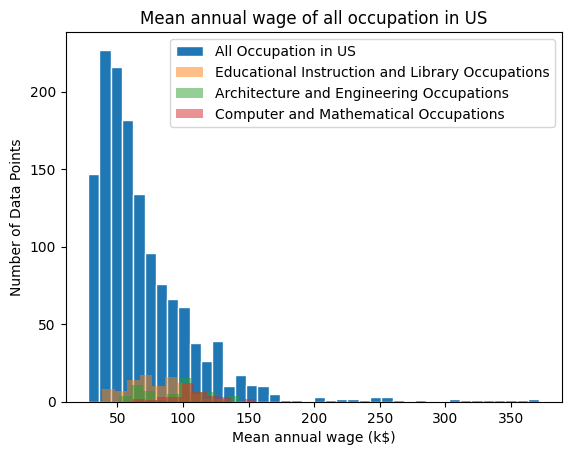

In [54]:
#Virsualize (see bar chart graph below) the number of data in each category among all US data
#from the blue bars I can find that in the US over 50% of jobs have wages less than $70,000 and there are more than 400 kinds of jobs that have a wage between $40,000-55,000
#other color bars show how those occupations' mean wage located compared with each occupation I chose and compare with the entire US data 
plt.hist(x= "AM", data=dt, edgecolor='white', bins=40, label="All Occupation in US")
plt.hist(x = "AM", data = educationData,alpha=0.5,label = "Educational Instruction and Library Occupations")
plt.hist(x = "AM", data = engineerData,alpha=0.5,label = "Architecture and Engineering Occupations")
plt.hist(x = "AM", data = CandMData,alpha=0.5,label = "Computer and Mathematical Occupations")
plt.title("Mean annual wage of all occupation in US")
plt.ylabel("Number of Data Points")
plt.xlabel("Mean annual wage (k$)")
plt.legend()
plt.show()

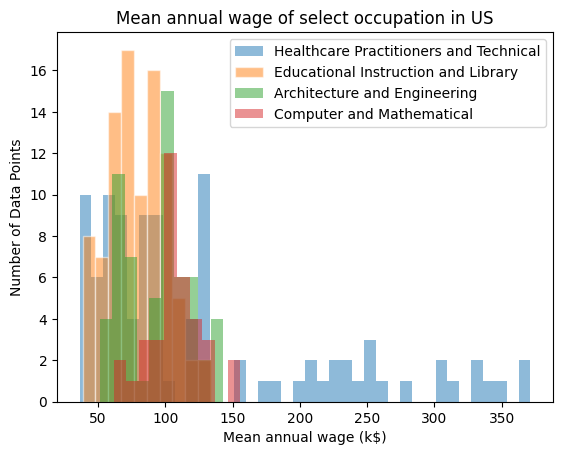

In [55]:
#Virsualize (see graph below) the number of data in each category (not among all US data)
#This graph is actually a similar graph as the graph above. The only difference is in this graph I add health occupations (see blue bars below) and this graph doesn't have all US occupations
#I find that the amount of wages of health occupations (blue bars) are very separate because they have a lot less than $50,000 jobs and have a lot $20,000-35,000 jobs
#Computer and Mathematical Occupations have the most concentration amount of wage since most of these occupations have a annual mean wage around $10,000
plt.hist(x = "AM", data = healData,alpha=0.5, bins = 38,label = "Healthcare Practitioners and Technical")
plt.hist(x = "AM", data = educationData,alpha=0.5, bins = 10,edgecolor='white',label = "Educational Instruction and Library")
plt.hist(x = "AM", data = engineerData,alpha=0.5, bins = 10,label = "Architecture and Engineering")
plt.hist(x = "AM", data = CandMData,alpha=0.5, bins = 10,label = "Computer and Mathematical")
plt.title("Mean annual wage of select occupation in US")
plt.ylabel("Number of Data Points")
plt.xlabel("Mean annual wage (k$)")
plt.legend()
plt.show()

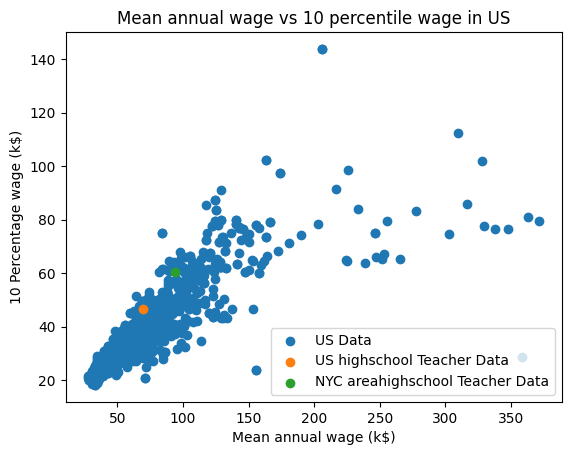

In [56]:
#I created a scatter chart which is Mean annual wage compare with 10 percentile wage in US
# I do so because I want to see the relationship between them
# I did find that some job have really low starting wage (low 10 percentile wage) but their wage increase fast as time goes by (have much higher mean wage compare with 10 percentile wage)
#add US highschool teacher data (the orange point) and NYC area teacher data (the green point) to the graph
plt.scatter(data=dt, x="AM", y="PT10", label="US Data")
plt.scatter(data=hsteacherData, x="AM", y="PT10", label="US highschool Teacher Data")
plt.scatter( x=hsteacherData1["AM"], y=hsteacherData1['PT10'], label="NYC areahighschool Teacher Data")
plt.title("Mean annual wage vs 10 percentile wage in US")
plt.ylabel("10 Percentage wage (k$)")
plt.xlabel("Mean annual wage (k$)")
plt.legend()
plt.show()

In [57]:
#find the data which have over 150k first 10 percentage wage (high starting wage)
#Those jobs below are the job that have over $150,000 10 percentile wage means really high wage when they just start their job
#The highest is Nurse Anesthetists, they already have $205,770 when they are new to working
over100k10ptData= dt.loc[dt["PT10"] >=100]
print("Over 100k are: ")
print (over100k10ptData["OCC_TITLE"]+" $"+over100k10ptData["A_MEAN"])
highest10ptData= dt.loc[dt["PT10"] >=140]
print("\nThe highest one is: ")
print (highest10ptData["OCC_TITLE"]+" $"+highest10ptData["A_MEAN"])

#The job have less than 30,000 10 percentile but have more than 350,000 mean wage
#seems that Athletes and Sports Competiors have a low starting wage (10 percentile $28,510) but a high mean wage ($358,080)
oData= dt.loc[dt["PT10"] <=40]
pData=oData.loc[oData["AM"] >=350]
print("\nthe data starts low but end up super high:")
print (pData["OCC_TITLE"]+" mean $"+pData["A_MEAN"])
print ("10 percentile wage: $ "+pData["A_PCT10"])


Over 100k are: 
48     Architectural and Engineering Managers $163,310
49     Architectural and Engineering Managers $163,310
503           Oral and Maxillofacial Surgeons $309,410
529                        Nurse Anesthetists $205,770
530                        Nurse Anesthetists $205,770
539                            Dermatologists $327,650
dtype: object

The highest one is: 
529    Nurse Anesthetists $205,770
530    Nurse Anesthetists $205,770
dtype: object

the data starts low but end up super high:
463    Athletes and Sports Competitors mean $358,080
dtype: object
463    10 percentile wage: $ 28,510
Name: A_PCT10, dtype: object


In [58]:
#find data that have greater than 200k mean annual wage
#Just curious who earns most
#Seems that a lot kinds of doctor have a very high wage as they deserve
#the highest is Orthopedic Surgeons, Except Pediatric $371,400
#Athletes and Sports Competitors also earn a lot, they have a mean annual wage og$358,080
higher20kmeanData= dt.loc[dt["AM"] >=200]
print (higher20kmeanData["OCC_TITLE"]+" $"+higher20kmeanData["A_MEAN"])
highestMeanData=dt.loc[dt["AM"] >=370]
print("\n which one is the highest?")
print (highestMeanData["OCC_TITLE"]+" $"+highestMeanData["A_MEAN"])

3                               Chief Executives $246,440
4                               Chief Executives $246,440
463              Athletes and Sports Competitors $358,080
503              Oral and Maxillofacial Surgeons $309,410
504                                Orthodontists $216,320
505              Dentists, All Other Specialists $233,430
529                           Nurse Anesthetists $205,770
530                           Nurse Anesthetists $205,770
537                                   Physicians $251,990
538                            Anesthesiologists $302,970
539                               Dermatologists $327,650
540                Emergency Medicine Physicians $316,600
541                   Family Medicine Physicians $224,460
542         General Internal Medicine Physicians $225,270
543                                 Neurologists $255,510
544              Obstetricians and Gynecologists $277,320
545                       Pediatricians, General $203,240
546           

In [59]:
#data that have less than 30k mean annual wage
#to see what kind of jobs earn lest
#the lest one is Shampooers. I don't know what are shampooers but they only earn $27,870 annually
#Now I know that shampooers are the ones who "Responsible for cleansing hair in a beauty salon or barbershop. Applies shampoo, rubs scalp vigorously, rinses hair, and applies conditioner."
lessthan25kmeanData= dt.loc[dt["AM"] <=30]
print (lessthan25kmeanData["OCC_TITLE"]+" $"+lessthan25kmeanData["A_MEAN"])
lowestMeanData=dt.loc[dt["AM"] <=28]
print("\n which one is the lowest?")
print (lowestMeanData["OCC_TITLE"]+" $"+lowestMeanData["A_MEAN"])

663     Lifeguards, Ski Patrol, and Other Recreational...
674                              Cooks, Fast Food $27,920
685                 Fast Food and Counter Workers $28,130
686                 Fast Food and Counter Workers $28,130
691     Other Food Preparation and Serving Related Wor...
694                                   Dishwashers $29,560
695                                   Dishwashers $29,560
696     Hosts and Hostesses, Restaurant, Lounge, and C...
697     Hosts and Hostesses, Restaurant, Lounge, and C...
730     Entertainment Attendants and Related Workers $...
737     Ushers, Lobby Attendants, and Ticket Takers $2...
738     Ushers, Lobby Attendants, and Ticket Takers $2...
739     Miscellaneous Entertainment Attendants and Rel...
740           Amusement and Recreation Attendants $28,350
759                                    Shampooers $27,870
769                             Childcare Workers $29,570
770                             Childcare Workers $29,570
784           

Seems that having a starting wage around $30,000 and mean annual of around $45,000 is the most common combination


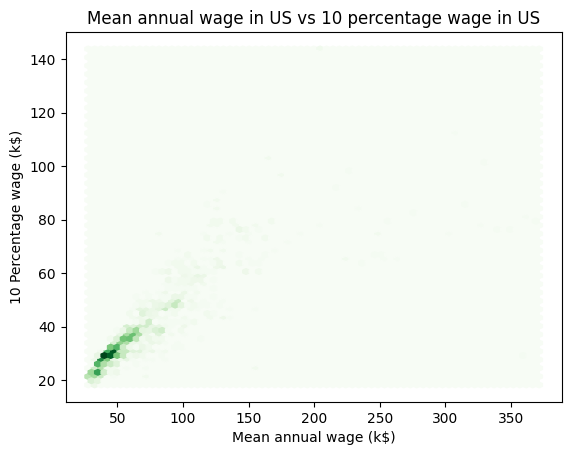

In [60]:
#AM vs PT10 hexbin (find the most common combination of Anual wage vs 10 Percentage wage)
#Another fancy graph, the more common the combination, the more green it is 
#Seems that a job having a starting wage around $30,000 and mean annual of around $45,000 is the most common combination
plt.hexbin(data=dt, x="AM", y="PT10", gridsize = 70,cmap = "Greens")
plt.title("Mean annual wage in US vs 10 percentage wage in US")
plt.ylabel("10 Percentage wage (k$)")
plt.xlabel("Mean annual wage (k$)")
print("Seems that having a starting wage around $30,000 and mean annual of around $45,000 is the most common combination")  

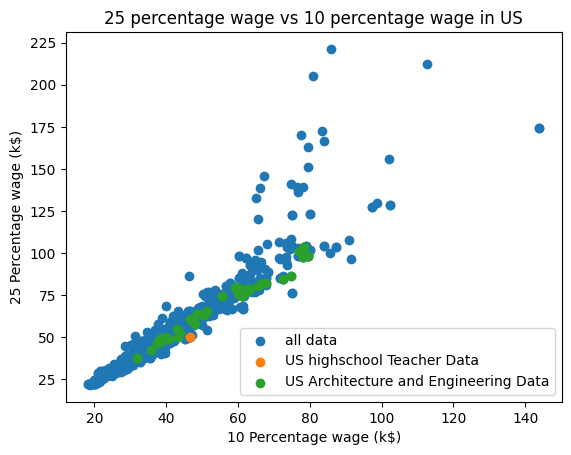

In [61]:
#10 percentile vs 25 percentile scatter graph
#I also add US teacher (orange point) and Engineering occupations data ( green points)
#teachers raise their wages relatively slower because the orange point is located in a low place compare with the trend line of blue points, means that a lot of other occupations have a higher increase from 10 to 25 percentile wage compared with teacher's
plt.scatter(data=dt, x="PT10", y="PT25",label="all data")
plt.scatter(data=hsteacherData, x="PT10", y="PT25", label="US highschool Teacher Data")
plt.scatter(data=engineerData, x="PT10", y="PT25", label="US Architecture and Engineering Data")
plt.title("25 percentage wage vs 10 percentage wage in US")
plt.ylabel("25 Percentage wage (k$)")
plt.xlabel("10 Percentage wage (k$)")
plt.legend()
plt.show()

In [62]:
#which have 10 percentage smaller than 100k but 25 percentage greager than 200k?
#Emergency Medicine Physicians $316,600 (annual mean wage) and Pediatric Surgeons $362,970 (annual mean wage)
#means that their wages increase super fast at least at first
thisData= dt.loc[dt["PT25"] >=200]
thatData= thisData.loc[thisData['PT10'] <= 100]
print (thatData["OCC_TITLE"]+" $"+thatData["A_MEAN"])

540    Emergency Medicine Physicians $316,600
553               Pediatric Surgeons $362,970
dtype: object


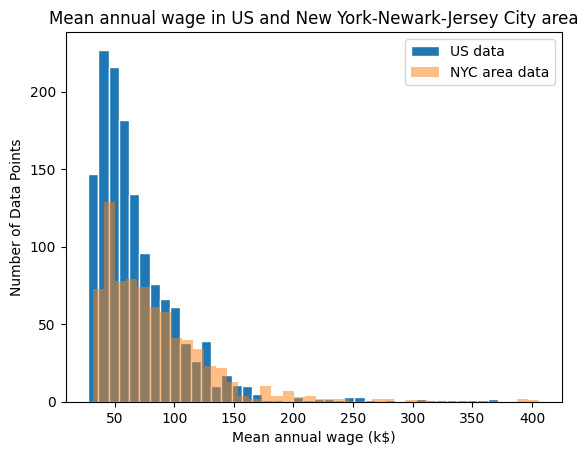

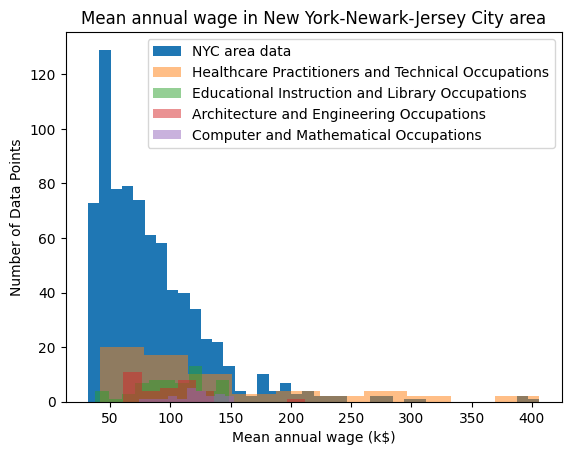

In [63]:
#from first graph, compare nyc area data with US data, I found there is unnormally high number of jobs that have a wage right before $50,000
#Is there any policy in the NYC area to make people control their salary below $50,000?
#I did find some policy:
#Rent Freeze for Renters: Eligible New Yorkers...can stop their rent from increasing...an annual household income of $50,000 or less...
#A low-income family is typically described as one that lives off of a net income of around $58,000 per year.
plt.hist(x= "AM", data=dt, edgecolor='white', bins=40, label="US data")
plt.hist(x= "AM", data=nycdt, bins=40,alpha=0.5, label ="NYC area data")
plt.ylabel("Number of Data Points")
plt.xlabel("Mean annual wage (k$)")
plt.title("Mean annual wage in US and New York-Newark-Jersey City area")
plt.legend()
plt.show()

plt.hist(x= "AM", data=nycdt, bins=40, label ="NYC area data")
plt.hist(x = "AM", data = healData1,alpha=0.5,label = "Healthcare Practitioners and Technical Occupations")
plt.hist(x = "AM", data = educationData1,alpha=0.5,label = "Educational Instruction and Library Occupations")
plt.hist(x = "AM", data = engineerData1,alpha=0.5,label = "Architecture and Engineering Occupations")
plt.hist(x = "AM", data = CandMData1,alpha=0.5,label = "Computer and Mathematical Occupations")
plt.title("Mean annual wage in New York-Newark-Jersey City area")
plt.ylabel("Number of Data Points")
plt.xlabel("Mean annual wage (k$)")
plt.legend()
plt.show()

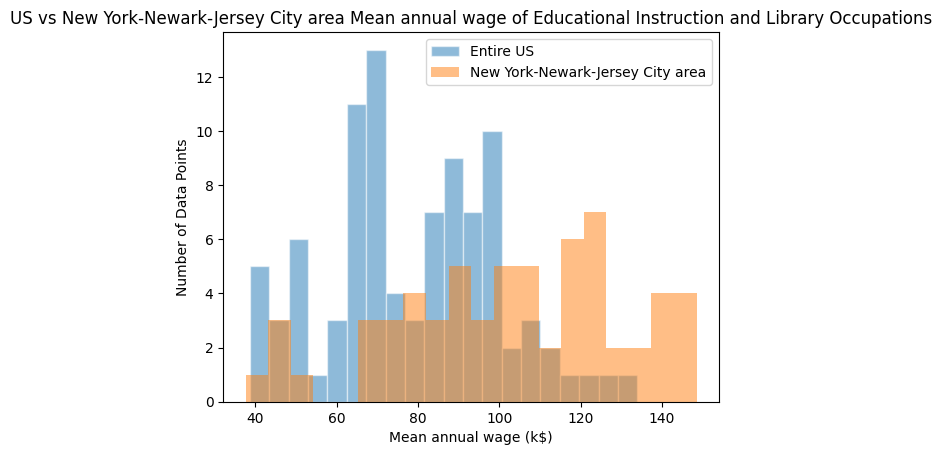

In [64]:
#US vs New York-Newark-Jersey City area Mean annual wage of Educational Instruction and Library Occupations
#New York City area educators have higher mean wage than US average
plt.hist(x = "AM", data = educationData,alpha=0.5, bins = 20,edgecolor='white',label = "Entire US")
plt.hist(x = "AM", data = educationData1,alpha=0.5, bins = 20,label = "New York-Newark-Jersey City area")
plt.title("US vs New York-Newark-Jersey City area Mean annual wage of Educational Instruction and Library Occupations")
plt.ylabel("Number of Data Points")
plt.xlabel("Mean annual wage (k$)")
plt.legend()
plt.show()

In [65]:
#which types of teachers around New York City area earn more than 140k per year?
#Below post-secondary teachers do
richteacherdata= educationData1.loc[educationData1['AM'] >= 140]
print (richteacherdata["OCC_TITLE"]+" $"+richteacherdata["A_MEAN"])
richestteacherdata= educationData1.loc[educationData1["OCC_TITLE"].str.contains('Health Specialties Teachers, Postsecondary')]
print("\nhighest one:")
print (richestteacherdata["OCC_TITLE"])
print (" $148,530")

193            Business Teachers, Postsecondary $141,540
197         Engineering Teachers, Postsecondary $141,720
206           Economics Teachers, Postsecondary $143,020
212    Health Specialties Teachers, Postsecondary $14...
217                 Law Teachers, Postsecondary $144,500
219    Art, Drama, and Music Teachers, Postsecondary ...
dtype: object

highest one:
212    Health Specialties Teachers, Postsecondary
Name: OCC_TITLE, dtype: object
 $148,530


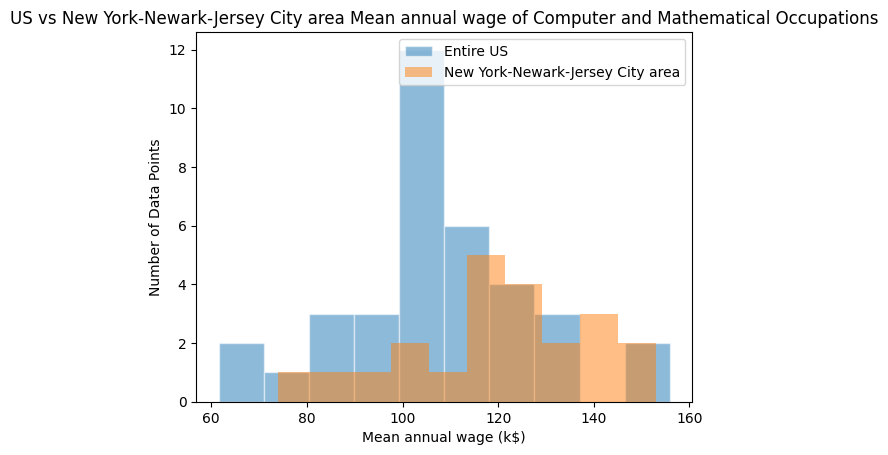

In [66]:
#graph of US vs New York-Newark-Jersey City area Mean annual wage of Computer and Mathematical Occupations
# NYC data is higher, but the difference is not as large as Educator occupation
plt.hist(x = "AM", data = CandMData,alpha=0.5, bins = 10,edgecolor='white',label = "Entire US")
plt.hist(x = "AM", data = CandMData1,alpha=0.5, bins = 10,label = "New York-Newark-Jersey City area")
plt.title("US vs New York-Newark-Jersey City area Mean annual wage of Computer and Mathematical Occupations")
plt.ylabel("Number of Data Points")
plt.xlabel("Mean annual wage (k$)")
plt.legend()
plt.show()

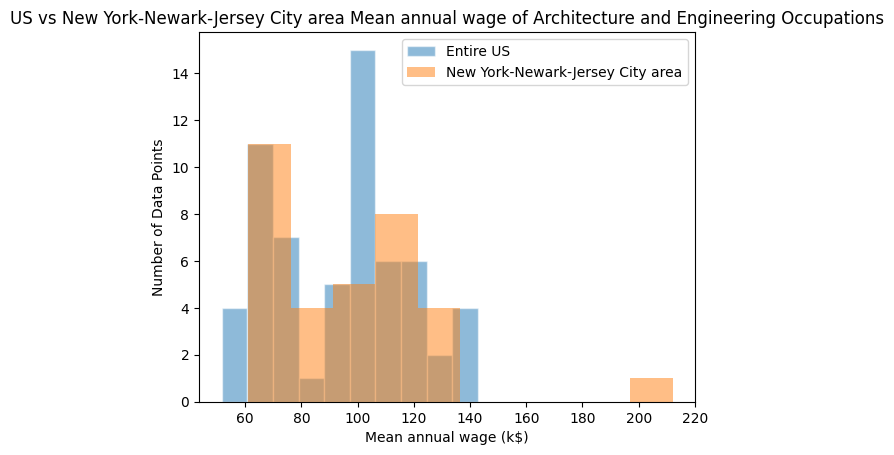

In [67]:
#Surprisingly, the wages of Architecture and Engineering Occupations don't have that much difference between US data and NYC data
#Guess being an engineer in NYC is not a good choice since the wage is similar but living cost is much higher than other place
plt.hist(x = "AM", data = engineerData,alpha=0.5, bins = 10,edgecolor='white',label = "Entire US")
plt.hist(x = "AM", data = engineerData1,alpha=0.5, bins = 10,label = "New York-Newark-Jersey City area")
plt.title("US vs New York-Newark-Jersey City area Mean annual wage of Architecture and Engineering Occupations")
plt.ylabel("Number of Data Points")
plt.xlabel("Mean annual wage (k$)")
plt.legend()
plt.show()

In [68]:
#which types of engineers earn more than 200k per year in nyc area?
#Petroleum Engineers $212,050
richEngineerData= engineerData1.loc[engineerData1['AM'] >= 200]
print("\nmore than 200k per year in nyc area:")
print (richEngineerData["OCC_TITLE"]+" $"+richEngineerData["A_MEAN"])

#more than 100 in US?
#see below list
richEngineerData1= engineerData.loc[engineerData['AM'] >= 100]
print("\n\n\nmore than 100k in us:")
print (richEngineerData1["OCC_TITLE"]+" $"+richEngineerData1["A_MEAN"])


more than 200k per year in nyc area:
110    Petroleum Engineers $212,050
dtype: object



more than 100k in us:
176                                   Engineers $107,170
177                         Aerospace Engineers $127,090
178                         Aerospace Engineers $127,090
181       Bioengineers and Biomedical Engineers $108,060
182       Bioengineers and Biomedical Engineers $108,060
183                          Chemical Engineers $117,820
184                          Chemical Engineers $117,820
187                 Computer Hardware Engineers $140,830
188                 Computer Hardware Engineers $140,830
189        Electrical and Electronics Engineers $115,680
190                        Electrical Engineers $114,050
191      Electronics Engineers, Except Computer $118,460
192                     Environmental Engineers $101,670
193                     Environmental Engineers $101,670
195    Health and Safety Engineers, Except Mining Saf...
197       Marine Engineers and N

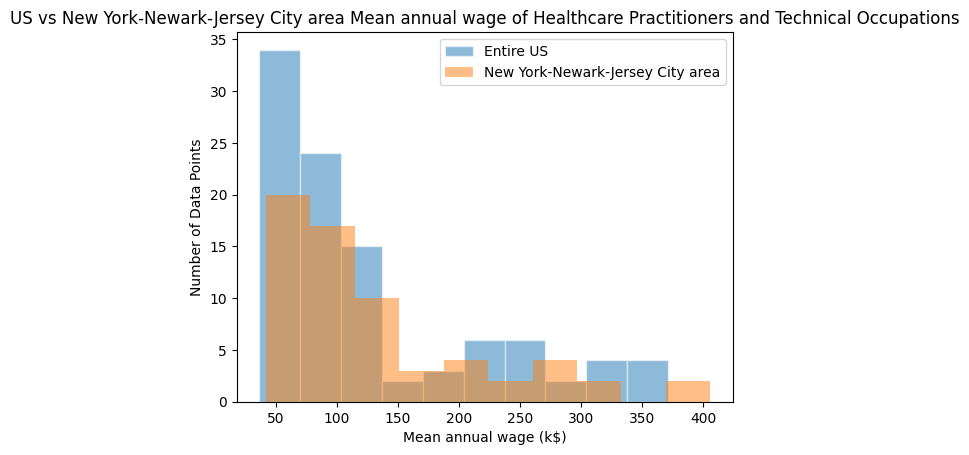

In [69]:
#The wage of health occupation is also similar compare with NYC area and the US
plt.hist(x = "AM", data = healData,alpha=0.5, bins = 10,edgecolor='white',label = "Entire US")
plt.hist(x = "AM", data = healData1,alpha=0.5, bins = 10,label = "New York-Newark-Jersey City area")
plt.title("US vs New York-Newark-Jersey City area Mean annual wage of Healthcare Practitioners and Technical Occupations")
plt.ylabel("Number of Data Points")
plt.xlabel("Mean annual wage (k$)")
plt.legend()
plt.show()